<a href="https://colab.research.google.com/github/gkumbhare/Object-Detection/blob/main/objection_detecton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
!pip install -U --pre tensorflow=="2.8.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 26.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing 

In [ ]:
import os
import pathlib

In [ ]:
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4065, done.
remote: Counting objects: 100% (4065/4065), done.
remote: Compressing objects: 100% (3104/3104), done.
remote: Total 4065 (delta 1185), reused 1944 (delta 901), pack-reused 0
Receiving objects: 100% (4065/4065), 54.72 MiB | 28.08 MiB/s, done.
Resolving deltas: 100% (1185/1185), done.


In [ ]:
%%bash


# Change the working directory to models/research
cd /content/models/research/

# Compile Protocol Buffers files
protoc object_detection/protos/*.proto --python_out=.

# Copy setup.py from object_detection/packages/tf2 to the current directory
cp object_detection/packages/tf2/setup.py .

# Install a Python package (replace '=m' with the actual package name you want to install)
python -m pip install package_name

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for package_name: filename=package_name-0.1-py3-none-any.whl size=1232 sha256=12f4cee85c3397d82445a3a33ab9096c8b0d20289ce0039ff4295c284ca26402
  Stored in directory: /root/.cache/pip/wheels/a3/36/c4/98d928f30290fb88555f848f73093f02b67c984a45c56c3e97
Successfully built package_name


In [ ]:
!pip install object_detection
import io
import os
import scipy.misc
import six
import time
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf
from object_detection.utils import visualization_utils as viz_utils
%matplotlib inline


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.1 MB/s eta 0:00:00


In [ ]:
from six import BytesIO

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels),where channels = 3 for RGB.

  Args:
  path: a file path (this can be local or on colossus)

  Returns:
  uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path,'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [ ]:
# Load the COCO Label Map
category_index = {
    1:{'id':1, 'name': 'person'},
    2:{'id':2, 'name': 'bicycle'},
    3:{'id':2, 'name': 'car'},
    4:{'id':4, 'name': 'motorcycle'},
    5:{'id':5, 'name': 'airplane'},
    6:{'id':6, 'name': 'bus'},
    7:{'id':7, 'name': 'train'},
    8:{'id':8, 'name': 'truck'},
    9:{'id':9, 'name': 'boat '},
    10:{'id':10, 'name': 'traffic light'},
    11:{'id':11, 'name': 'fire hydrant'},
    12:{'id':12, 'name': 'stop sign'},
    13:{'id':13, 'name': 'parking meter'},
    14:{'id':14, 'name': 'bench'},
    15:{'id':15, 'name': 'bird'},
    16:{'id':16, 'name': 'cat'},
    17:{'id':17, 'name': 'horse'},
    18:{'id':18, 'name': 'dog'},
    19:{'id':19, 'name': 'sheep'},
    20:{'id':20, 'name': 'cow'},
    21:{'id':21, 'name': 'elephant'},
    22:{'id':22, 'name': 'bear'},
    23:{'id':23, 'name': 'zebra'},
    24:{'id':24, 'name': 'giraffe'},
    25:{'id':25, 'name': 'backpack'},
    26:{'id':26, 'name': 'umbrella'},
    27:{'id':27, 'name': 'handbag'},
    28:{'id':28, 'name': 'tie'},
    29:{'id':29, 'name': 'suitcase'},
    30:{'id':30, 'name': 'frisbee'},
    31:{'id':31, 'name': 'skis'},
    32:{'id':32, 'name': 'snowboard'},
    33:{'id':33, 'name': 'sports ball'},
    34:{'id':34, 'name': 'kite'},
    35:{'id':35, 'name': 'baseball bat'},
    36:{'id':36, 'name': 'baseball glove'},
    37:{'id':37, 'name': 'skateboard'},
    38:{'id':38, 'name': 'surfboard'},
    39:{'id':39, 'name': 'tennis racket'},
    40:{'id':40, 'name': 'bottle'},
    41:{'id':41, 'name': 'wine glass'},
    42:{'id':42, 'name': 'cup'},
    43:{'id':43, 'name': 'fork'},
    44:{'id':44, 'name': 'knife'},
    45:{'id':45, 'name': 'spoon'},
    46:{'id':46, 'name': 'bowl'},
    47:{'id':47, 'name': 'banana'},
    48:{'id':48, 'name': 'apple '},
    49:{'id':49, 'name': 'sandwich'},
    50:{'id':50, 'name': 'orange'},
    51:{'id':51, 'name': 'broccoli'},
    52:{'id':52, 'name': 'carrot'},
    53:{'id':53, 'name': 'hot dog'},
    54:{'id':54, 'name': 'pizza'},
    55:{'id':55, 'name': 'donut'},
    56:{'id':56, 'name': 'donut'},
    57:{'id':57, 'name': 'cake'},
    58:{'id':58, 'name': 'chair'},
    59:{'id':59, 'name': 'couch'},
    60:{'id':60, 'name': 'potted plant'},
    61:{'id':61, 'name': 'bed'},
    62:{'id':62, 'name': 'dining tabel'},
    63:{'id':63, 'name': 'toilet'},
    64:{'id':64, 'name': 'tv'},
    65:{'id':65, 'name': 'laptop'},
    67:{'id':67, 'name': 'mouse'},
    68:{'id':68, 'name': 'remote'},
    69:{'id':69, 'name': 'keyboard'},
    70:{'id':70, 'name': 'cell phone'},
    71:{'id':71, 'name': 'microwave'},
    72:{'id':72, 'name': 'oven'},
    73:{'id':73, 'name': 'toster'},
    74:{'id':74, 'name': 'sink'},
    75:{'id':75, 'name': 'refrigerator'},
    76:{'id':76, 'name': 'book'},
    77:{'id':77, 'name': 'clock'},
    78:{'id':78, 'name': 'vase'},
    79:{'id':79, 'name': 'scissors'},
    80:{'id':80, 'name': 'teddy bear'},
    81:{'id':81, 'name': 'hair drier'},
    82:{'id':82, 'name': 'toothbrush'}
}

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d5_coco17_tpu-32.tar.gz
!tar -xf efficientdet_d5_coco17_tpu-32.tar.gz
!mv efficientdet_d5_coco17_tpu-32/ models/research/object_detection/test_data/

--2023-12-20 02:46:53--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d5_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.204.207, 172.253.123.207, 142.251.107.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.204.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256286417 (244M) [application/x-tar]
Saving to: ‘efficientdet_d5_coco17_tpu-32.tar.gz’

efficientdet_d5_coc 100%[===================>] 244.41M   122MB/s    in 2.0s    

2023-12-20 02:46:55 (122 MB/s) - ‘efficientdet_d5_coco17_tpu-32.tar.gz’ saved [256286417/256286417]



In [ ]:
start_time = time.time()
tf.keras.backend.clear_session()
detect_fn = tf.saved_model.load('/content/models/research/object_detection/test_data/efficientdet_d5_coco17_tpu-32/saved_model')
end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed time: ' + str(elapsed_time) + 's')

Elapsed time: 63.72391653060913s


Elapsed time:23.498924374580383second per image


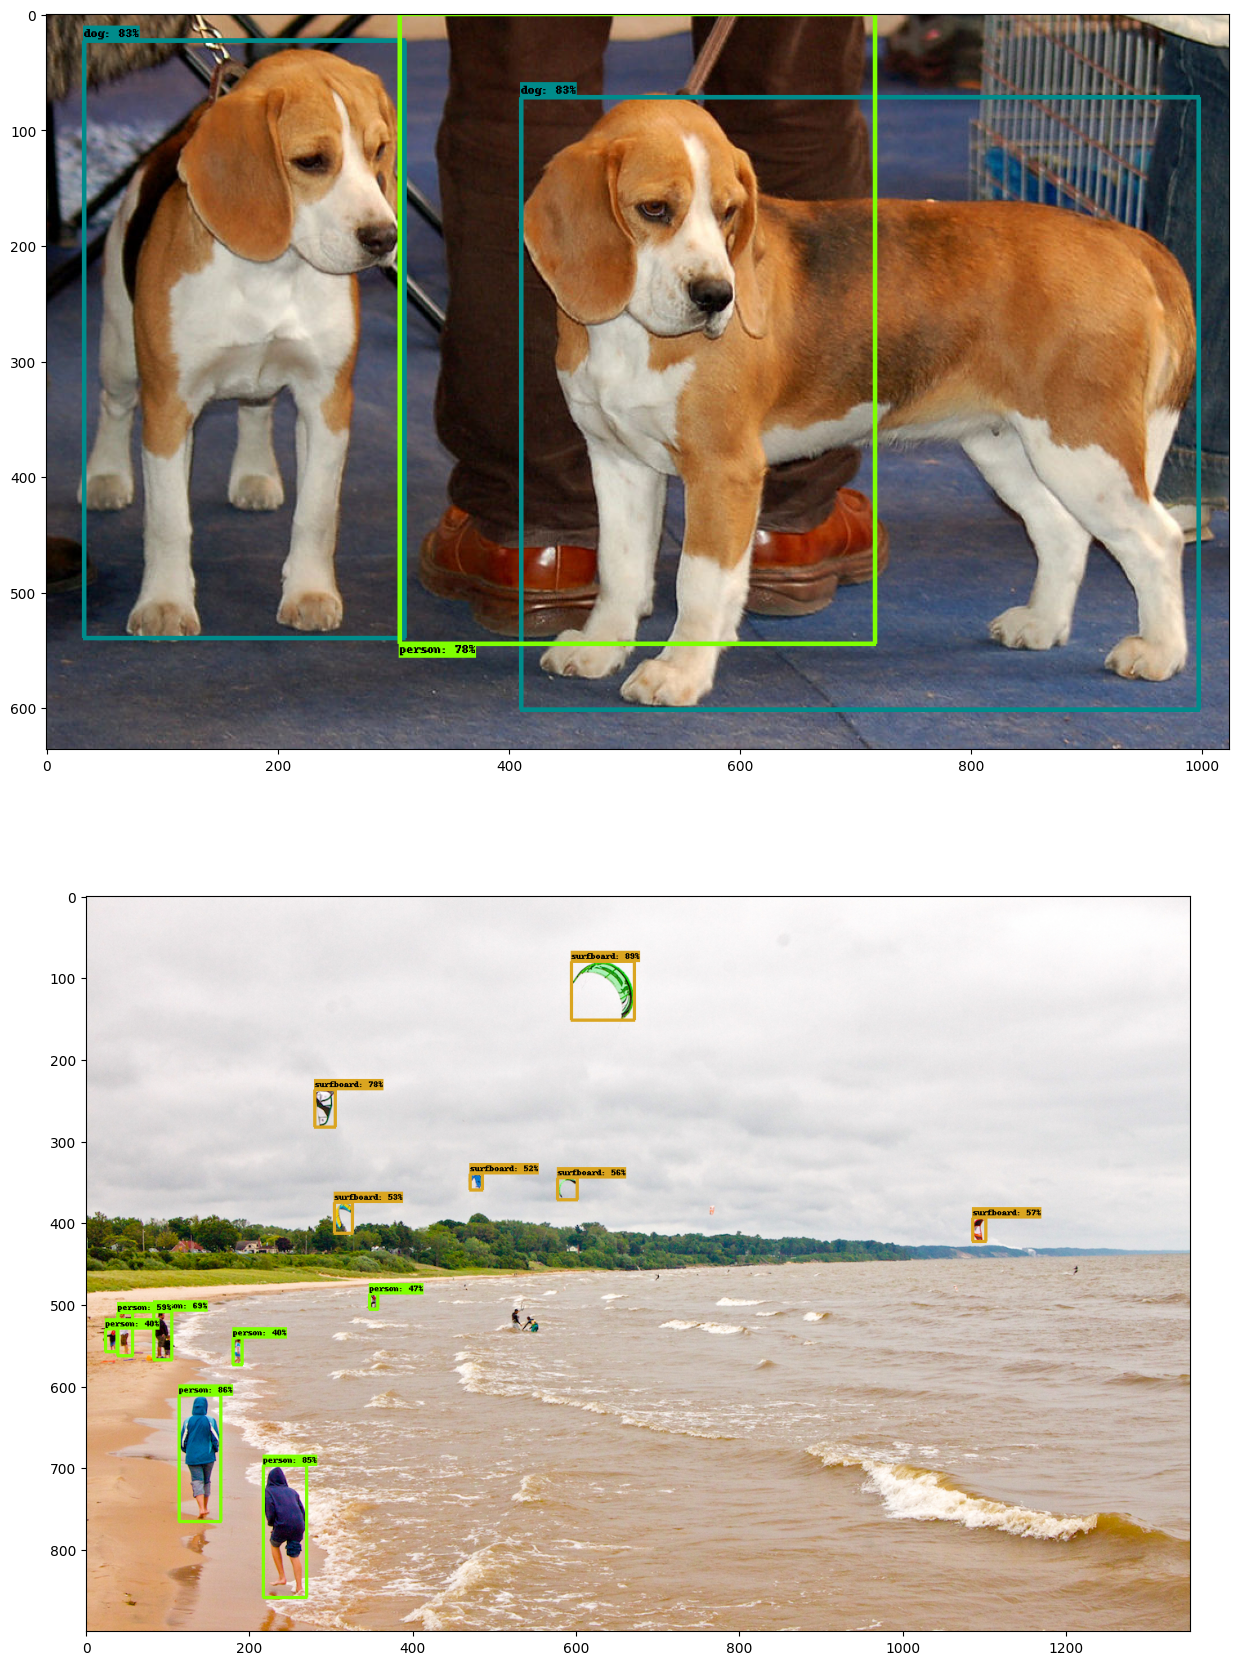

In [ ]:
import time

image_dir = '/content/models/research/object_detection/test_images'

elapsed = []
for i in range(2):
  image_path = os.path.join(image_dir, 'image' + str(i+1) + '.jpg')
  image_np = load_image_into_numpy_array(image_path)
  input_tensor = np.expand_dims(image_np,0)
  start_time = time.time()
  detections = detect_fn(input_tensor)
  end_time = time.time()
  elapsed.append(end_time - start_time)

  plt.rcParams['figure.figsize'] = [42, 21]
  label_id_offset = 1
  image_np_with_detections = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.int32),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.40,
      agnostic_mode=False)
  plt.subplot(2,1, i+1)
  plt.imshow(image_np_with_detections)

mean_elapsed = sum(elapsed) / float(len(elapsed))
print('Elapsed time:' + str(mean_elapsed)+ 'second per image')